<a href="https://colab.research.google.com/github/Crismayall/Trabajo-Final-Finanzas-3/blob/main/Trabajo_Final_F3_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo final Finanzas III #

**Integrantes:**
*   CALBULLANCA S. YASMÍN SOLEDAD
*   GONZÁLEZ B. JAVIERA ANDREA
*   OYARZÚN E. CRISTÓBAL IGNACIO
*   URRIOLA T. ANAÍS ANTONIA

## Librerias ##

In [ ]:
# Instalación (si no están instaladas en tu entorno)
!pip install yfinance

# IMPORTACIÓN DE LIBRERÍAS

# NumPy: para cálculos numéricos con vectores, matrices y funciones matemáticas
import numpy as np

# Matplotlib: para crear gráficos y visualizaciones
import matplotlib.pyplot as plt

# SciPy.stats.norm: para la función de distribución normal acumulada (usada en Black-Scholes)
from scipy.stats import norm

# yfinance: para descargar datos financieros reales desde Yahoo Finance
import yfinance as yf

# pandas: para la manipulación y análisis de datos, especialmente series de tiempo
import pandas as pd

# datetime y timedelta: para manejar fechas
from datetime import datetime, timedelta

## Bonos ##



----------------------------------------------------------------------------------------------------
VALORACIÓN DE BONO
----------------------------------------------------------------------------------------------------
Datos: Valor Nominal=$1000, Tasa Cupón=12.00%, Años=10, Tasa Mercado=10.00%
Resultado: El precio calculado actual del bono es $1122.89
----------------------------------------------------------------------------------------------------


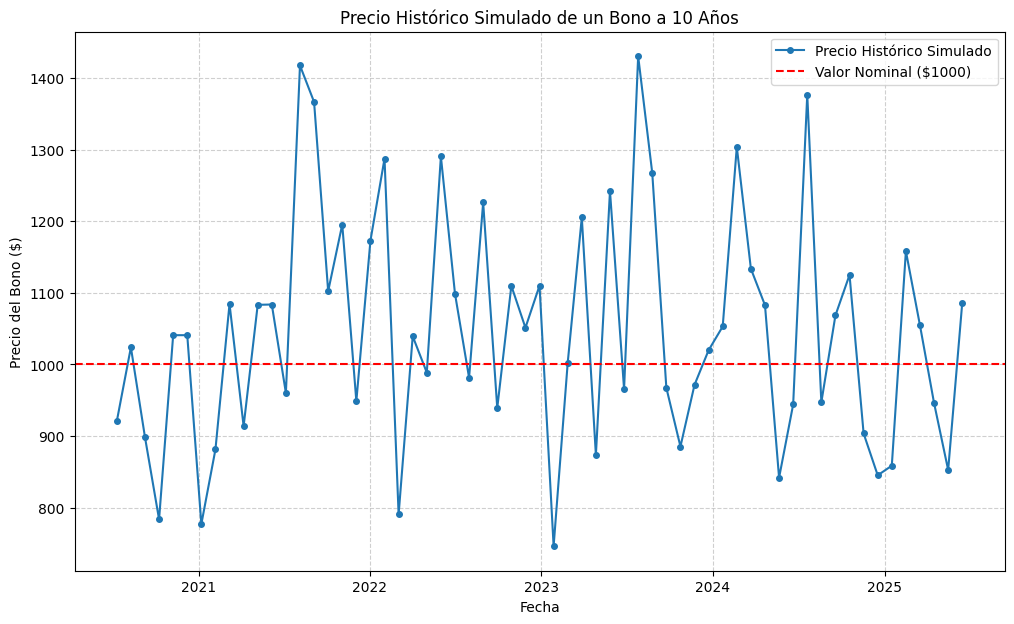

In [ ]:
## 1. BONOS ##

# --- Función de Valoración ---
def valorar_bono(valor_nominal, tasa_cupon_anual, n_anos, tasa_mercado_anual):
    """Calcula el precio de un bono descontando sus flujos de caja futuros."""
    cupon_anual = valor_nominal * tasa_cupon_anual
    flujos_caja = [cupon_anual] * n_anos
    flujos_caja[-1] += valor_nominal # Al final se devuelve el nominal

    # Cálculo del valor presente de cada flujo de caja
    precio = sum([flujo / ((1 + tasa_mercado_anual) ** (i + 1)) for i, flujo in enumerate(flujos_caja)])
    return precio

# --- Parámetros del Bono ---
bono_nominal = 1000
bono_cupon = 0.12  # Tasa cupón del 12%
bono_anos = 10
bono_mercado = 0.10 # Tasa de mercado actual del 10%

# --- Cálculo y Resultados ---
precio_bono_actual = valorar_bono(bono_nominal, bono_cupon, bono_anos, bono_mercado)
print("-" * 100)
print("VALORACIÓN DE BONO")
print("-" * 100)
print(f"Datos: Valor Nominal=${bono_nominal}, Tasa Cupón={bono_cupon:.2%}, Años={bono_anos}, Tasa Mercado={bono_mercado:.2%}")
print(f"Resultado: El precio calculado actual del bono es ${precio_bono_actual:.2f}")
print("-" * 100)

# --- Gráfico con Precios Históricos Simulados ---
# 1. Crear un rango de fechas para la simulación (últimos 5 años)
fechas_historicas = pd.to_datetime([datetime.now() - timedelta(days=x) for x in range(365 * 5, 0, -30)])

# 2. Simular tasas de mercado históricas
np.random.seed(42) # Para que la simulación sea reproducible
tasas_mercado_simuladas = np.random.normal(loc=bono_cupon, scale=0.03, size=len(fechas_historicas))
tasas_mercado_simuladas[tasas_mercado_simuladas <= 0] = 0.01 # Evitar tasas negativas

# 3. Calcular los precios históricos
precios_historicos = [valorar_bono(bono_nominal, bono_cupon, bono_anos, t) for t in tasas_mercado_simuladas]

# 4. Crear el gráfico
plt.figure(figsize=(12, 7))
plt.plot(fechas_historicas, precios_historicos, marker='o', linestyle='-', markersize=4, label='Precio Histórico Simulado')
plt.title('Precio Histórico Simulado de un Bono a 10 Años')
plt.xlabel('Fecha')
plt.ylabel('Precio del Bono ($)')
plt.axhline(bono_nominal, color='red', linestyle='--', label=f'Valor Nominal (${bono_nominal})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## Acciones ##

----------------------------------------------------------------------------------------------------
VALORACIÓN DE MSFT (MODELO GORDON)
----------------------------------------------------------------------------------------------------
Beta (β) utilizado: 1.03
Precio Calculado: $508.83 | Precio Real: $503.51
CONCLUSIÓN: La acción podría estar INFRAVALORADA.
----------------------------------------------------------------------------------------------------


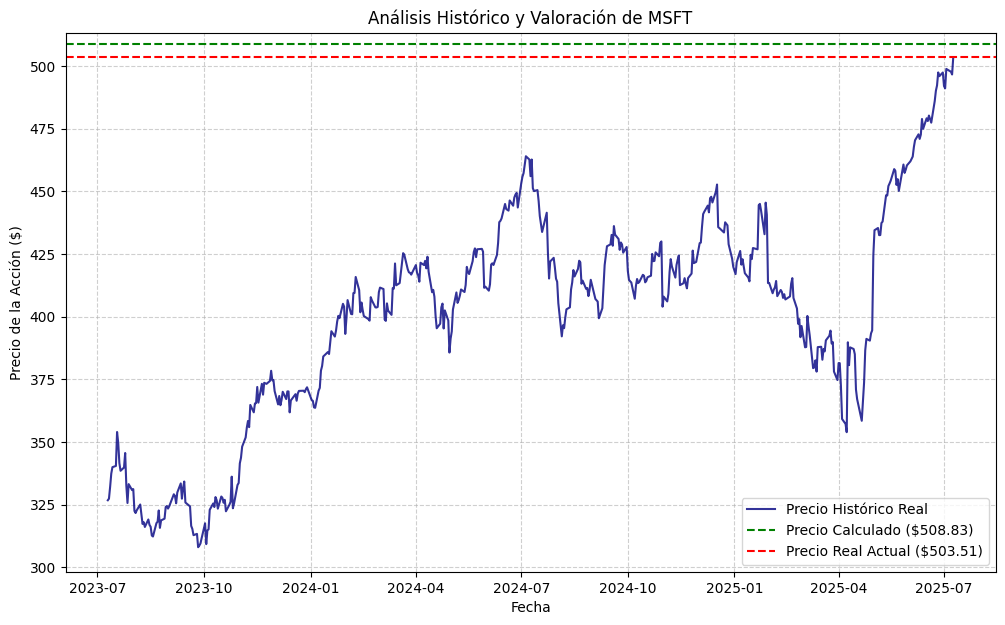

In [ ]:
## 2. ACCIONES ##

# --- Funciones de Valoración y Obtención de Datos ---
def valorar_accion_gordon(dividendo_prox_anio, tasa_descuento, tasa_crecimiento_constante):
    """Calcula el valor de una acción usando el Modelo de Crecimiento de Gordon (P0 = D1 / (k - g))."""
    if tasa_descuento <= tasa_crecimiento_constante:
        print("Error: La tasa de descuento (k) debe ser mayor que la tasa de crecimiento (g).")
        return np.nan
    return dividendo_prox_anio / (tasa_descuento - tasa_crecimiento_constante)

def obtener_info_financiera(ticker):
    """Obtiene el beta, precio actual e historial de un ticker."""
    try:
        stock = yf.Ticker(ticker)
        historial = stock.history(period="2y")

        # Comprobar si se obtuvieron datos históricos
        if historial.empty:
            print(f"Error: No se pudo obtener el historial de precios para {ticker}.")
            return None, None, None

        # --- MEJORA: Obtener precio de forma más robusta ---
        precio = historial['Close'].iloc[-1]
        beta = stock.info.get('beta')

        # --- MEJORA: Comprobar si se obtuvo el beta ---
        if beta is None:
            print(f"ADVERTENCIA: No se pudo obtener el beta para {ticker} automáticamente.")

        return beta, precio, historial['Close']
    except Exception as e:
        print(f"Error general al obtener datos para {ticker}: {e}")
        return None, None, None

# --- Parámetros para Microsoft (MSFT) ---
ticker_msft = "MSFT"
dividendo_trimestral_actual = 0.75
g = 0.095  # Tasa de crecimiento constante supuesta
tasa_libre_riesgo = 0.044
retorno_mercado = 0.10

# --- Cálculos y Resultados ---
beta_msft, precio_real_msft, historial_msft = obtener_info_financiera(ticker_msft)

# --- MEJORA: Opción para introducir el beta manualmente si falla la carga automática ---
if beta_msft is None:
    # Si la línea anterior falló en obtener el beta, puedes establecerlo manualmente aquí.
    # Simplemente quita el # de la siguiente línea y usa un valor de Yahoo Finance.
    # beta_msft = 0.92
    print("El beta no pudo ser cargado. Usando un valor manual o deteniendo el script.")


# Proceder solo si tenemos todos los datos necesarios
if beta_msft is not None and precio_real_msft is not None:
    k = tasa_libre_riesgo + beta_msft * (retorno_mercado - tasa_libre_riesgo)
    D1 = (dividendo_trimestral_actual * 4) * (1 + g)
    precio_calculado_msft = valorar_accion_gordon(D1, k, g)

    print("-" * 100)
    print(f"VALORACIÓN DE {ticker_msft.upper()} (MODELO GORDON)")
    print("-" * 100)
    print(f"Beta (β) utilizado: {beta_msft:.2f}")
    print(f"Precio Calculado: ${precio_calculado_msft:.2f} | Precio Real: ${precio_real_msft:.2f}")
    if precio_calculado_msft > precio_real_msft:
        print("CONCLUSIÓN: La acción podría estar INFRAVALORADA.")
    else:
        print("CONCLUSIÓN: La acción podría estar SOBREVALORADA.")
    print("-" * 100)

    # --- Gráfico Histórico ---
    plt.figure(figsize=(12, 7))
    plt.plot(historial_msft.index, historial_msft.values, label='Precio Histórico Real', color='navy', alpha=0.8)
    plt.axhline(precio_calculado_msft, color='green', linestyle='--', label=f'Precio Calculado (${precio_calculado_msft:.2f})')
    plt.axhline(precio_real_msft, color='red', linestyle='--', label=f'Precio Real Actual (${precio_real_msft:.2f})')
    plt.title(f'Análisis Histórico y Valoración de {ticker_msft.upper()}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de la Acción ($)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("No se pudieron obtener todos los datos de MSFT para la valoración. Verifica el beta.")

## Futuros / Forward ##

VALORACIÓN DE FUTURO - APPLE INC (AAPL)
Precio Spot actual: $211.14
Precio teórico del futuro hoy: $215.94


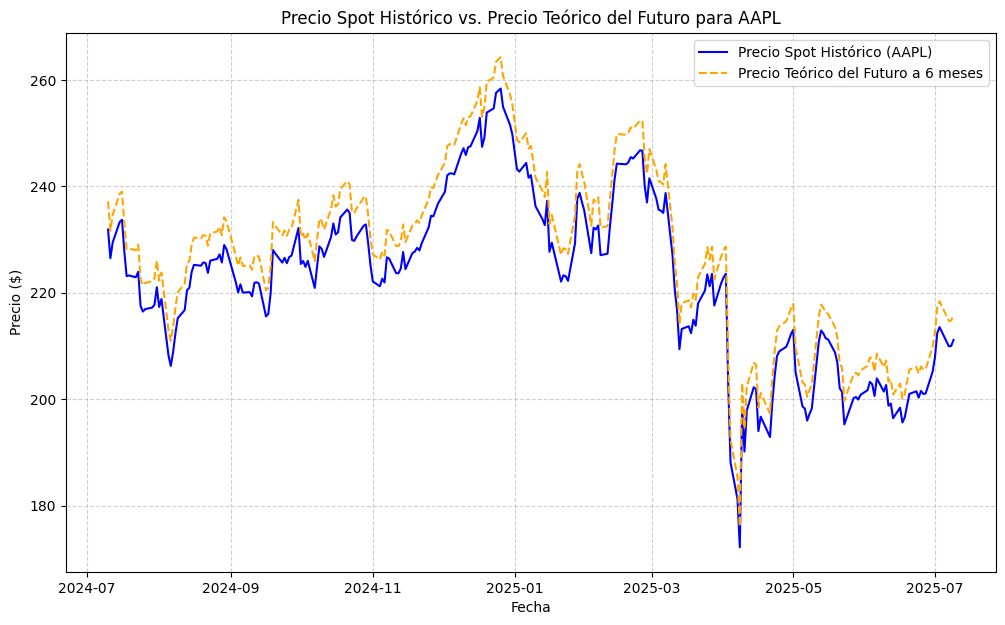

In [ ]:
# --- Función para calcular el precio del futuro ---
def calcular_precio_futuro(precio_spot, tasa_libre_riesgo, tiempo_vencimiento):
    """Calcula el precio teórico de un futuro (F0 = S0 * e^(rT))."""
    return precio_spot * np.exp(tasa_libre_riesgo * tiempo_vencimiento)

# --- Parámetros para un futuro sobre Apple (AAPL) ---
ticker_aapl = "AAPL"
tasa_riesgo = 0.045
tiempo_venc_meses = 6
tiempo_venc_anos = tiempo_venc_meses / 12

# --- Obtención de Datos, Cálculo y Gráfico ---
try:
    apple_hist = yf.Ticker(ticker_aapl).history(period="1y")
    if apple_hist.empty:
        raise Exception("No se obtuvieron datos históricos.")

    precios_spot_hist = apple_hist['Close']
    precio_spot_actual = precios_spot_hist.iloc[-1]
    precio_futuro_actual = calcular_precio_futuro(precio_spot_actual, tasa_riesgo, tiempo_venc_anos)

    print("VALORACIÓN DE FUTURO - APPLE INC (AAPL)")
    print(f"Precio Spot actual: ${precio_spot_actual:.2f}")
    print(f"Precio teórico del futuro hoy: ${precio_futuro_actual:.2f}")

    # --- Gráfico Histórico Spot vs. Futuro ---
    precios_futuros_hist = [calcular_precio_futuro(s, tasa_riesgo, tiempo_venc_anos) for s in precios_spot_hist]

    plt.figure(figsize=(12, 7))
    plt.plot(precios_spot_hist.index, precios_spot_hist.values, label='Precio Spot Histórico (AAPL)', color='blue')
    plt.plot(precios_spot_hist.index, precios_futuros_hist, label=f'Precio Teórico del Futuro a {tiempo_venc_meses} meses', color='orange', linestyle='--')
    plt.title('Precio Spot Histórico vs. Precio Teórico del Futuro para AAPL')
    plt.xlabel('Fecha')
    plt.ylabel('Precio ($)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except Exception as e:
    print(f"No se pudo realizar el análisis de futuros para {ticker_aapl}: {e}")

## Opciones ##

----------------------------------------------------------------------------------------------------
VALORACIÓN DE OPCIONES (BLACK-SCHOLES) - GOOGLE (GOOGL)
Precio del Activo (S): $176.62 | Precio de Ejercicio (K): $185.45 | Volatilidad (σ): 32.06%
----------------------------------------------------------------------------------------------------
Precio de la Opción Call: $13.91
Precio de la Opción Put: $18.61
----------------------------------------------------------------------------------------------------


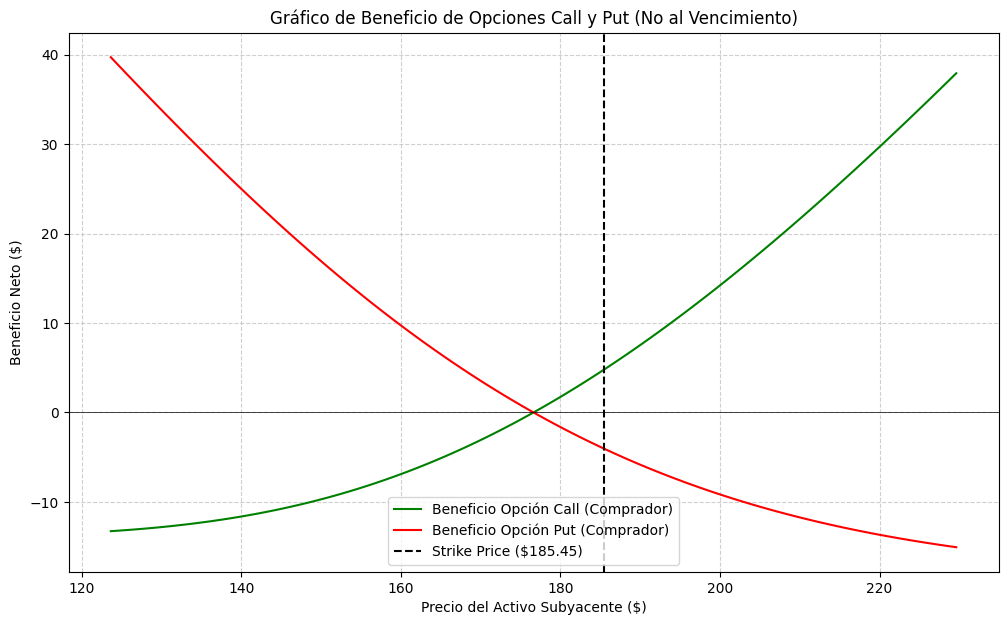

In [ ]:
## 4. OPCIONES ##

# --- Función de Black-Scholes ---
def black_scholes(S, K, T, r, sigma, option_type='call'):
    """Calcula el precio de una opción europea usando el modelo de Black-Scholes."""
    # Pre-cálculo para evitar división por cero si T=0
    if T == 0:
      if option_type == 'call':
        return max(0.0, S - K)
      else: # put
        return max(0.0, K - S)

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

# --- Parámetros para una opción sobre Google (GOOGL) ---
ticker_googl = "GOOGL"
try:
    googl_stock = yf.Ticker(ticker_googl)
    hist_googl = googl_stock.history(period="1y")

    # ---- INICIO DE LA CORRECCIÓN ----
    # Comprobar si el historial de datos está vacío
    if hist_googl.empty:
        raise ValueError(f"No se pudieron obtener datos históricos para {ticker_googl}")

    # Forma más robusta de obtener el precio actual (S)
    S = hist_googl['Close'].iloc[-1]
    # ---- FIN DE LA CORRECCIÓN ----

    sigma = np.std(np.log(hist_googl['Close'] / hist_googl['Close'].shift(1))) * np.sqrt(252)
    K = S * 1.05  # Strike Price (5% por encima del precio actual)
    T = 0.5       # Vencimiento en 6 meses
    r = 0.045     # Tasa libre de riesgo

    # --- Cálculos y Resultados ---
    call_price = black_scholes(S, K, T, r, sigma, 'call')
    put_price = black_scholes(S, K, T, r, sigma, 'put')

    print("-" * 100)
    print("VALORACIÓN DE OPCIONES (BLACK-SCHOLES) - GOOGLE (GOOGL)")
    print(f"Precio del Activo (S): ${S:.2f} | Precio de Ejercicio (K): ${K:.2f} | Volatilidad (σ): {sigma:.2%}")
    print("-" * 100)
    print(f"Precio de la Opción Call: ${call_price:.2f}")
    print(f"Precio de la Opción Put: ${put_price:.2f}")
    print("-" * 100)

    # --- Gráfico de Beneficio ---
    S_range = np.linspace(S * 0.7, S * 1.3, 100)
    beneficio_call = [black_scholes(s_val, K, T, r, sigma, 'call') - call_price for s_val in S_range]
    beneficio_put = [black_scholes(s_val, K, T, r, sigma, 'put') - put_price for s_val in S_range]

    plt.figure(figsize=(12, 7))
    plt.plot(S_range, beneficio_call, label='Beneficio Opción Call (Comprador)', color='green')
    plt.plot(S_range, beneficio_put, label='Beneficio Opción Put (Comprador)', color='red')
    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(K, color='black', linestyle='--', label=f'Strike Price (${K:.2f})')
    plt.title('Gráfico de Beneficio de Opciones Call y Put (No al Vencimiento)')
    plt.xlabel('Precio del Activo Subyacente ($)')
    plt.ylabel('Beneficio Neto ($)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

except Exception as e:
    print(f"Error en el análisis de opciones para {ticker_googl}: {e}")

## Swaps ##

----------------------------------------------------------------------------------------------------
ANÁLISIS DE SWAP DE TASAS DE INTERÉS (EJEMPLO DE CLASE)
----------------------------------------------------------------------------------------------------
Situación Inicial (Costos de Endeudamiento):
  - Compañía X: Fija = 10.00%, Flotante = LIBOR + 0.30%
  - Compañía Y: Fija = 11.20%, Flotante = LIBOR + 1.00%

Resultados del Swap:
  - Costo final para Compañía X: LIBOR + 0.05%
  - Costo final para Compañía Y: 10.95% (fijo)

Conclusión (Ahorros):
  - X se ahorra 0.25%
  - Y se ahorra 0.25%
----------------------------------------------------------------------------------------------------


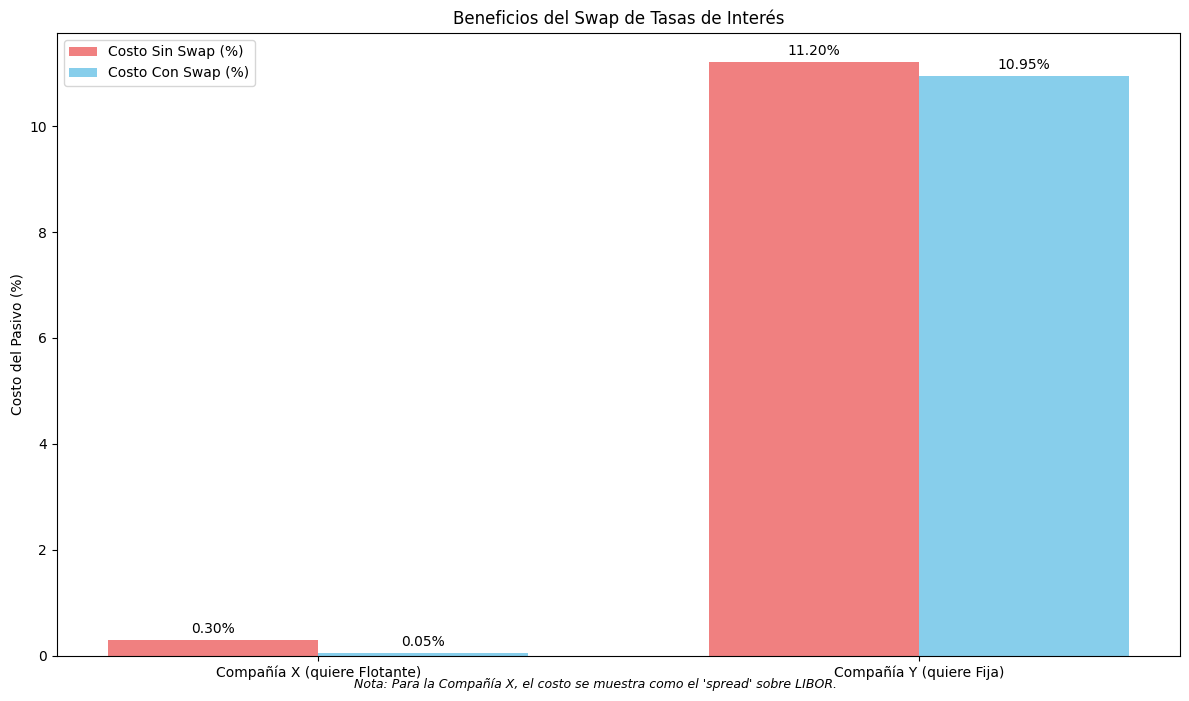

In [ ]:
## 5. SWAPS ##

# --- Parámetros del ejemplo del Swap de Tasas de Interés (páginas 79-83 del PDF) ---
costos = {
    'X': {'fija': 0.10, 'flotante_spread': 0.0030}, # LIBOR + 0.30%
    'Y': {'fija': 0.112, 'flotante_spread': 0.0100}  # LIBOR + 1.00%
}
tasa_fija_pagada_por_Y_a_X = 0.0995

# --- Cálculos del Costo Final ---
# Costo final para Compañía X = Préstamo Fijo - Fijo Recibido + Flotante Pagado
costo_X_con_swap_spread = costos['X']['fija'] - tasa_fija_pagada_por_Y_a_X

# Costo final para Compañía Y = Préstamo Flotante - Flotante Recibido + Fijo Pagado
# Como el LIBOR pagado y recibido se cancela, queda: Spread del préstamo + Fijo pagado
costo_Y_con_swap = costos['Y']['flotante_spread'] + tasa_fija_pagada_por_Y_a_X

print("-" * 100)
print("ANÁLISIS DE SWAP DE TASAS DE INTERÉS (EJEMPLO DE CLASE)")
print("-" * 100)
print("Situación Inicial (Costos de Endeudamiento):")
print(f"  - Compañía X: Fija = {costos['X']['fija']:.2%}, Flotante = LIBOR + {costos['X']['flotante_spread']:.2%}")
print(f"  - Compañía Y: Fija = {costos['Y']['fija']:.2%}, Flotante = LIBOR + {costos['Y']['flotante_spread']:.2%}")
print("\nResultados del Swap:")
print(f"  - Costo final para Compañía X: LIBOR + {costo_X_con_swap_spread:.2%}")
print(f"  - Costo final para Compañía Y: {costo_Y_con_swap:.2%} (fijo)")
print("\nConclusión (Ahorros):")
print(f"  - X se ahorra {costos['X']['flotante_spread'] - costo_X_con_swap_spread:.2%}")
print(f"  - Y se ahorra {costos['Y']['fija'] - costo_Y_con_swap:.2%}")
print("-" * 100)

# --- Gráfico Comparativo ---
labels = ['Compañía X (quiere Flotante)', 'Compañía Y (quiere Fija)']
costo_sin_swap = [costos['X']['flotante_spread'] * 100, costos['Y']['fija'] * 100]
costo_con_swap = [costo_X_con_swap_spread * 100, costo_Y_con_swap * 100]

x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, costo_sin_swap, width, label='Costo Sin Swap (%)', color='lightcoral')
rects2 = ax.bar(x + width/2, costo_con_swap, width, label='Costo Con Swap (%)', color='skyblue')

ax.set_ylabel('Costo del Pasivo (%)')
ax.set_title('Beneficios del Swap de Tasas de Interés')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1, padding=3, fmt='%.2f%%')
ax.bar_label(rects2, padding=3, fmt='%.2f%%')
plt.figtext(0.5, 0.01, "Nota: Para la Compañía X, el costo se muestra como el 'spread' sobre LIBOR.", ha="center", fontsize=9, style='italic')
fig.tight_layout()
plt.show()

## FRA ##

----------------------------------------------------------------------------------------------------
VALORACIÓN DE UN FORWARD RATE AGREEMENT (FRA)
El comprador del FRA se cubre contra una subida de tasas.
----------------------------------------------------------------------------------------------------
Escenario: Tasa de mercado (6.00%) > Tasa FRA (5.00%)
Resultado: El vendedor paga al comprador $24,630.54.
----------------------------------------------------------------------------------------------------


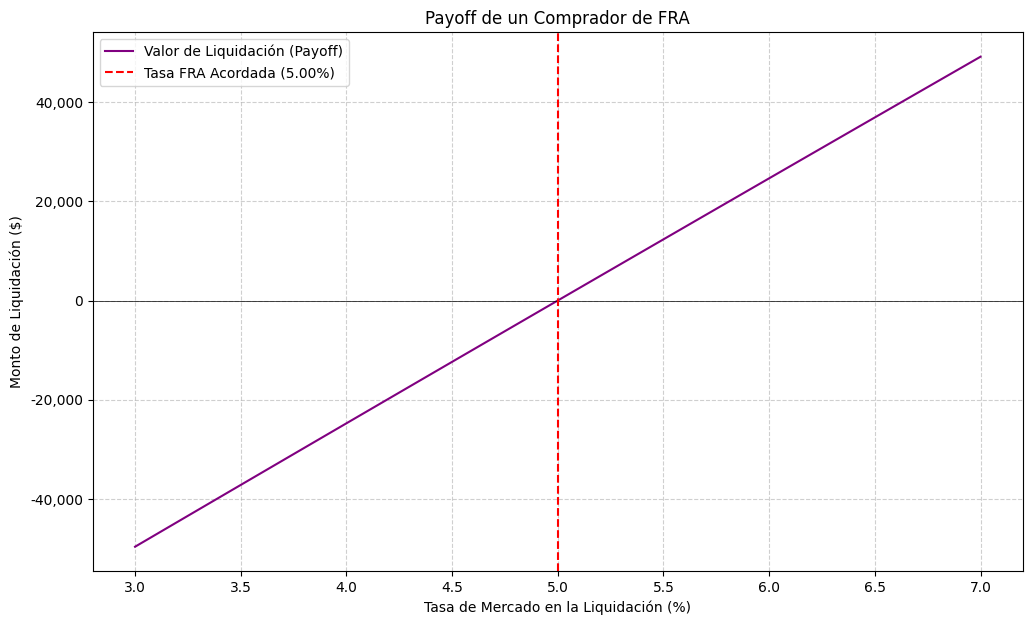

In [ ]:
# --- Función de Valoración ---
def valorar_fra(notional, fra_rate, market_rate, days_in_period):
    """Calcula el monto de liquidación de un FRA."""
    # Fórmula de liquidación descontada
    numerator = notional * (market_rate - fra_rate) * (days_in_period / 360)
    denominator = 1 + market_rate * (days_in_period / 360)
    return numerator / denominator

# --- Parámetros para un FRA 3x6 ---
P_nocional = 10_000_000  # $10 millones
tasa_FRA = 0.05          # 5.0% (tasa fija acordada)
dias = 90                # Período de interés de 90 días

# Escenario: la tasa de mercado en la liquidación sube al 6%
tasa_mercado_real = 0.06

# --- Cálculo y Resultados ---
liquidacion = valorar_fra(P_nocional, tasa_FRA, tasa_mercado_real, dias)

print("-" * 100)
print("VALORACIÓN DE UN FORWARD RATE AGREEMENT (FRA)")
print(f"El comprador del FRA se cubre contra una subida de tasas.")
print("-" * 100)
print(f"Escenario: Tasa de mercado ({tasa_mercado_real:.2%}) > Tasa FRA ({tasa_FRA:.2%})")
if liquidacion > 0:
    print(f"Resultado: El vendedor paga al comprador ${liquidacion:,.2f}.")
else:
    print(f"Resultado: El comprador paga al vendedor ${-liquidacion:,.2f}.")
print("-" * 100)

# --- Gráfico de Payoff del Comprador de FRA ---
market_rates_range = np.linspace(tasa_FRA - 0.02, tasa_FRA + 0.02, 100)
settlement_values = [valorar_fra(P_nocional, tasa_FRA, m_rate, dias) for m_rate in market_rates_range]

plt.figure(figsize=(12, 7))
plt.plot(market_rates_range * 100, settlement_values, label='Valor de Liquidación (Payoff)', color='purple')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(tasa_FRA * 100, color='red', linestyle='--', label=f'Tasa FRA Acordada ({tasa_FRA:.2%})')
plt.title('Payoff de un Comprador de FRA')
plt.xlabel('Tasa de Mercado en la Liquidación (%)')
plt.ylabel('Monto de Liquidación ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

### Informe ###

In [26]:
# Asegúrate de haber instalado fpdf2 primero
# !pip install fpdf2

from fpdf import FPDF
from fpdf.enums import XPos, YPos

# --- INICIO DE LA CREACIÓN DEL PDF COMPLETO ---

pdf = FPDF()
pdf.add_page()
pdf.set_font("Helvetica", "B", 16)
pdf.cell(0, 10, "Reporte de Valoracion de Activos Financieros", new_x=XPos.LMARGIN, new_y=YPos.NEXT, align="C")
pdf.ln(10)

# --- Sección 1: Bonos ---
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 10, "1. Resultados de Valoracion de Bonos", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
pdf.set_font("Helvetica", "", 11)
texto_bono = (
    f"Datos del Bono: Valor Nominal=${bono_nominal}, Tasa Cupon={bono_cupon:.2%}, Anos={bono_anos}\n"
    f"El precio calculado actual del bono es: ${precio_bono_actual:.2f}"
)
pdf.multi_cell(0, 5, texto_bono)
pdf.ln(5)
# Guardar y añadir el gráfico de Bonos
grafico_bono_path = "grafico_bono_historico.png"
plt.figure(figsize=(10, 6)); plt.plot(fechas_historicas, precios_historicos, marker='o', linestyle='-', markersize=4); plt.title('Precio Historico Simulado de un Bono'); plt.xlabel('Fecha'); plt.ylabel('Precio del Bono ($)'); plt.axhline(bono_nominal, color='red', linestyle='--', label=f'Valor Nominal (${bono_nominal})'); plt.grid(True, alpha=0.6); plt.legend(); plt.savefig(grafico_bono_path); plt.close()
pdf.image(grafico_bono_path, w=180)

# --- Sección 2: Acciones ---
pdf.add_page()
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 10, "2. Resultados de Valoracion de Acciones", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
pdf.set_font("Helvetica", "", 11)
if 'precio_calculado_msft' in locals():
    texto_acciones = (
        f"Valoracion para {ticker_msft} usando el Modelo de Gordon:\n"
        f"  - Beta utilizado: {beta_msft:.2f}\n"
        f"  - Tasa de Descuento (k): {k:.2%}\n"
        f"  - Precio Real de Mercado: ${precio_real_msft:.2f}\n"
        f"  - Precio Calculado por Modelo: ${precio_calculado_msft:.2f}"
    )
    pdf.multi_cell(0, 5, texto_acciones)
    pdf.ln(5)
    grafico_acciones_path = "grafico_acciones_historico.png"
    plt.figure(figsize=(10, 6)); plt.plot(historial_msft.index, historial_msft.values, label='Precio Historico Real', color='navy'); plt.axhline(precio_calculado_msft, color='green', linestyle='--', label=f'Precio Calculado (${precio_calculado_msft:.2f})'); plt.axhline(precio_real_msft, color='red', linestyle='--', label=f'Precio Real Actual (${precio_real_msft:.2f})'); plt.title(f'Analisis Historico y Valoracion de {ticker_msft}'); plt.xlabel('Fecha'); plt.ylabel('Precio ($)'); plt.legend(); plt.grid(True, alpha=0.6); plt.savefig(grafico_acciones_path); plt.close()
    pdf.image(grafico_acciones_path, w=180)
else:
    pdf.cell(0, 10, "No se pudieron generar los datos para la valoracion de acciones.")

# --- Sección 3: Futuros ---
pdf.add_page()
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 10, "3. Resultados de Valoracion de Futuros", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
pdf.set_font("Helvetica", "", 11)
if 'precio_futuro_actual' in locals():
    texto_futuros = (
        f"Valoracion para un futuro sobre {ticker_aapl}:\n"
        f"  - Precio Spot actual: ${precio_spot_actual:.2f}\n"
        f"  - Vencimiento: {tiempo_venc_meses} meses\n"
        f"  - Precio teorico del futuro hoy: ${precio_futuro_actual:.2f}"
    )
    pdf.multi_cell(0, 5, texto_futuros)
    pdf.ln(5)
    grafico_futuros_path = "grafico_futuros_historico.png"
    plt.figure(figsize=(10, 6)); plt.plot(precios_spot_hist.index, precios_spot_hist.values, label=f'Precio Spot ({ticker_aapl})', color='blue'); plt.plot(precios_spot_hist.index, precios_futuros_hist, label=f'Precio Teorico del Futuro', color='orange', linestyle='--'); plt.title(f'Precio Spot vs. Precio Teorico del Futuro para {ticker_aapl}'); plt.xlabel('Fecha'); plt.ylabel('Precio ($)'); plt.legend(); plt.grid(True, alpha=0.6); plt.savefig(grafico_futuros_path); plt.close()
    pdf.image(grafico_futuros_path, w=180)
else:
    pdf.cell(0, 10, "No se pudieron generar los datos para la valoracion de futuros.")

# --- Sección 4: Opciones ---
pdf.add_page()
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 10, "4. Resultados de Valoracion de Opciones", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
pdf.set_font("Helvetica", "", 11)
if 'call_price' in locals():
    texto_opciones = (
        f"Valoracion para {ticker_googl} usando Black-Scholes:\n"
        f"  - Precio del Activo (S): ${S:.2f}\n"
        f"  - Precio de Ejercicio (K): ${K:.2f}\n"
        f"  - Volatilidad (sigma): {sigma:.2%}\n"
        f"  - Precio Opcion Call: ${call_price:.2f}\n"
        f"  - Precio Opcion Put: ${put_price:.2f}"
    )
    pdf.multi_cell(0, 5, texto_opciones)
    pdf.ln(5)
    grafico_opciones_path = "grafico_opciones_beneficio.png"
    S_range = np.linspace(S * 0.7, S * 1.3, 100)
    beneficio_call = [black_scholes(s_val, K, T, r, sigma, 'call') - call_price for s_val in S_range]
    plt.figure(figsize=(10, 6)); plt.plot(S_range, beneficio_call, label='Beneficio Opcion Call', color='green'); plt.axhline(0, color='black', lw=0.5); plt.axvline(K, color='black', linestyle='--', label=f'Strike (${K:.2f})'); plt.title('Grafico de Beneficio Opcion Call'); plt.xlabel('Precio del Activo ($)'); plt.ylabel('Beneficio Neto ($)'); plt.legend(); plt.grid(True, alpha=0.6); plt.savefig(grafico_opciones_path); plt.close()
    pdf.image(grafico_opciones_path, w=180)
else:
    pdf.cell(0, 10, "No se pudieron generar los datos para la valoracion de opciones.")

# --- Sección 5: Swaps ---
pdf.add_page()
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 10, "5. Resultados de Analisis de Swaps", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
pdf.set_font("Helvetica", "", 11)
texto_swaps = (
    "Analisis de Swap de Tasas de Interes (Ejemplo de Clase):\n\n"
    "Costos sin Swap:\n"
    f"  - Compania X: Fija = {costos['X']['fija']:.2%}, Flotante = LIBOR + {costos['X']['flotante_spread']:.2%}\n"
    f"  - Compania Y: Fija = {costos['Y']['fija']:.2%}, Flotante = LIBOR + {costos['Y']['flotante_spread']:.2%}\n\n"
    "Costos con Swap:\n"
    f"  - Costo final para Compania X: LIBOR + {costo_X_con_swap_spread:.2%}\n"
    f"  - Costo final para Compania Y: {costo_Y_con_swap:.2%} (fijo)\n\n"
    f"Ahorro total generado por el Swap: {costos['X']['fija'] - costos['Y']['fija'] - (costos['X']['flotante_spread'] - costos['Y']['flotante_spread']):.2%}"
)
pdf.multi_cell(0, 5, texto_swaps)
pdf.ln(5)
grafico_swaps_path = "grafico_swaps.png"
fig, ax = plt.subplots(figsize=(10, 6)); x = np.arange(len(labels)); rects1 = ax.bar(x - width/2, costo_sin_swap, width, label='Costo Sin Swap (%)', color='lightcoral'); rects2 = ax.bar(x + width/2, costo_con_swap, width, label='Costo Con Swap (%)', color='skyblue'); ax.set_ylabel('Costo del Pasivo (%)'); ax.set_title('Beneficios del Swap de Tasas de Interes'); ax.set_xticks(x); ax.set_xticklabels(labels); ax.legend(); ax.bar_label(rects1, padding=3, fmt='%.2f%%'); ax.bar_label(rects2, padding=3, fmt='%.2f%%'); fig.tight_layout(); plt.savefig(grafico_swaps_path); plt.close()
pdf.image(grafico_swaps_path, w=180)

# --- Sección 6: FRA (Forward Rate Agreement) ---
pdf.add_page()
pdf.set_font("Helvetica", "B", 12)
pdf.cell(0, 10, "6. Resultados de Valoracion de FRA", new_x=XPos.LMARGIN, new_y=YPos.NEXT)
pdf.set_font("Helvetica", "", 11)
texto_fra = (
    "Valoracion de un Forward Rate Agreement (FRA):\n"
    f"  - Monto Nocional: ${P_nocional:,.2f}\n"
    f"  - Tasa FRA acordada (fija): {tasa_FRA:.2%}\n"
    f"  - Escenario de Tasa de Mercado: {tasa_mercado_real:.2%}\n\n"
    f"Resultado: El vendedor del FRA debe pagar al comprador ${liquidacion:,.2f}."
)
pdf.multi_cell(0, 5, texto_fra)
pdf.ln(5)
grafico_fra_path = "grafico_fra_payoff.png"
market_rates_range = np.linspace(tasa_FRA - 0.02, tasa_FRA + 0.02, 100)
settlement_values = [valorar_fra(P_nocional, tasa_FRA, m_rate, dias) for m_rate in market_rates_range]
plt.figure(figsize=(10, 6)); plt.plot(market_rates_range * 100, settlement_values, label='Valor de Liquidacion (Payoff)', color='purple'); plt.axhline(0, color='black', lw=0.5); plt.axvline(tasa_FRA * 100, color='red', linestyle='--', label=f'Tasa FRA Acordada ({tasa_FRA:.2%})'); plt.title('Payoff de un Comprador de FRA'); plt.xlabel('Tasa de Mercado (%)'); plt.ylabel('Monto de Liquidacion ($)'); plt.legend(); plt.grid(True, alpha=0.6); plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ','))); plt.savefig(grafico_fra_path); plt.close()
pdf.image(grafico_fra_path, w=180)

# Guardar el archivo PDF final
nombre_archivo_pdf = "Informe_Trabajo_Final_Finanzas_III.pdf"
pdf.output(nombre_archivo_pdf)

print(f"¡El reporte COMPLETO se ha guardado exitosamente como '{nombre_archivo_pdf}'!")

¡El reporte COMPLETO se ha guardado exitosamente como 'Informe_Trabajo_Final_Finanzas_III.pdf'!
